In [1]:
# Script générant plusieurs figures montrant des exemples de segmentation d'un nuage de points 2D avec un 
# classificateur SVM linéaire et un classificateur SVM polynomial de degré 3. 
#
# Le but est de produire une figure similaire à celle de bishop-fig7_4 et de alpaydin-ed2-fig13_4 mentionnées 
# dans la présentation Apprentissage supervisé pour la classification de Christian Gagné pour l'École en 
# ligne en apprentissage automatique. Test

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
# Partie I:  Génération des données 2D

In [3]:
# Génération des données au moyen d'une somme de deux distributions gaussiennes anisotropes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Génération des données 2D
N_samples = 250

# Première gaussienne avec mu=(0,0)
centers = [[0, 0]]
X, y = make_blobs(n_samples=N_samples, centers=centers, random_state=40)
transformation = [[1, 0.2], [0.2, 1]]
X = np.dot(X, transformation)

# Seconde gaussienne avec mu=(2,2)
centers = [[0, 0]]
X2, y2 = make_blobs(n_samples=N_samples, centers=centers, random_state=40)
transformation = [[1, -0.5], [-0.5, 1]]
X2 = np.dot(X2, transformation) + [[2,2]]
y2 = y2 + 1

X = np.vstack((X, X2))
y = np.hstack((y, y2))
indx0 = np.where(y==0)
indx1 = np.where(y==1)

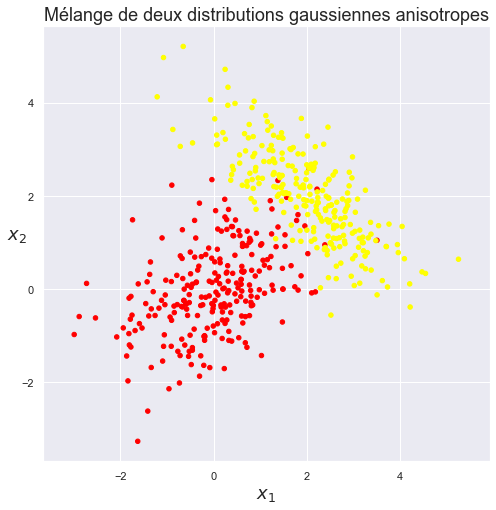

In [4]:
# Affichage de la distribution de l'ensemble des données

fig = plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='autumn')
ax = plt.gca()
ax.axis('equal')
ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax.set_title('Mélange de deux distributions gaussiennes anisotropes',fontsize=18)

plt.savefig('similar_to_page_59_1.svg', format='svg')
#plt.savefig('similar_to_page_59_1.svg', format='png')
plt.show()

In [5]:
# Séparation des données en deux ensembles; un d'entrainement (50 %) et un de test (50 %).

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.5)

In [6]:
# Partie II:  Classification des données en utilisant un classificateur SVM linéaire

In [7]:
from sklearn.svm import SVC

# On doit déterminer la valeur du paramètre C qui maximise les performances en classification du classificateur SVM linéaire.
# On utilise une grille logarithmique de valeurs de C
C = np.logspace(3,12,10, endpoint=False)

score = []
for c in C:
    # Entraine le modèle avec l'ensemble d'entrainement
    model = SVC(kernel='linear', C=c)
    clf = model.fit(X_train, y_train)

    # Évalue les performances avec l'ensemble de test
    score.append(clf.score(X_test, y_test))

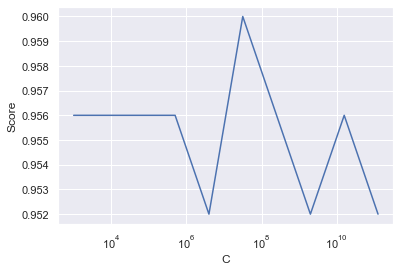

In [8]:
# Détermine la valeur optimale du paramètre C

fig, ax = plt.subplots()
ax.plot(C, score)

ax.set(xlabel='C', ylabel='Score')
ax.set_xscale('log')
ax.xaxis.grid(True, which='major')
plt.show()

# Valeur optimale de C
val = max(score)
indx = score.index(val)
c = C[indx]

In [9]:
# Entraine le modèle avec l'ensemble d'entrainement et la valeur optimale de C

model = SVC(kernel='linear', C=c)
clf = model.fit(X_train, y_train)

In [10]:
# Fonction d'affichage de la marge SVM

def plot_svc_decision_function(model, ax=None, plot_support=True):
    # Affiche la marge qui est définie selon h(X) = {-1, 0, +1}  
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Génère grille ou h(X) est échantillonnée
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Affiche contours de h(X) définissant la marge
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Affiche vecteurs de support
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',edgecolors='k');        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

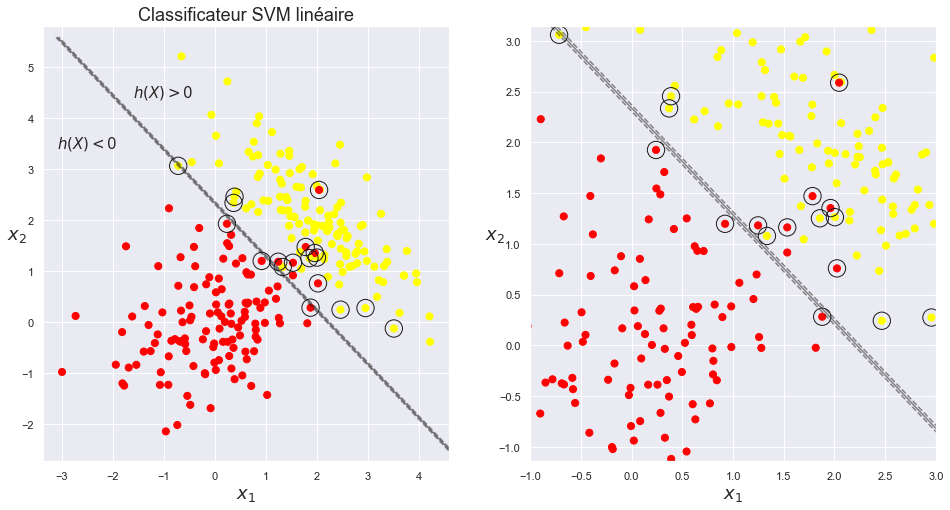

In [11]:
# Affichage des résultats de classification en utilisant les données d'entrainement.

fig = plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
ax = plt.gca()
ax.axis('equal')
ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax.text(-1,4.5, "$h(X)>0$", ha="center", va="center", size=15)
ax.text(-2.5,3.5, "$h(X)<0$", ha="center", va="center", size=15)
ax.set_title('Classificateur SVM linéaire',fontsize=18)

# Zoom sur la portion centrale ou les deux distributions se superposent
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
ax = plt.gca()
ax.axis('equal')
ax.set_xlim([-1,3])
ax.set_ylim([-1,3])
ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
plt.savefig('similar_to_page_59_2.svg', format='svg')
#plt.savefig('similar_to_page_59_2.svg', format='png')
plt.show()

In [12]:
# Partie III:  Classification des données en utilisant un classificateur SVM polynomial de degré 3

In [13]:
from sklearn.svm import SVC 

# On doit à nouveau déterminer la valeur du paramètre C qui maximise les performances en classification.
C3 = np.logspace(-3,10,14, endpoint=False)

score3 = []
for c3 in C3:
    # Entraine le modèle avec l'ensemble d'entrainement
    model = SVC(kernel='poly',degree=3, C=c3)
    clf = model.fit(X_train, y_train)

    # Évalue les performances avec l'ensemble de test
    score3.append(clf.score(X_test, y_test))

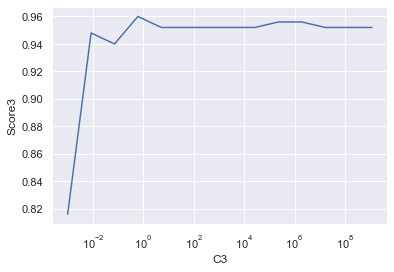

In [14]:
# Détermine la valeur optimale du paramètre C

fig, ax = plt.subplots()
ax.plot(C3, score3)

ax.set(xlabel='C3', ylabel='Score3')

ax.set_xscale('log')
ax.xaxis.grid(True, which='major')
plt.show()

# Valeur optimale
val = max(score3)
indx = score3.index(val)
c3 = C3[indx]

In [15]:
# Entraine le modèle optimal avec l'ensemble d'entrainement et la valeur optimale de C

model = SVC(kernel='poly',degree=3, C=c3)
clf = model.fit(X_train, y_train)

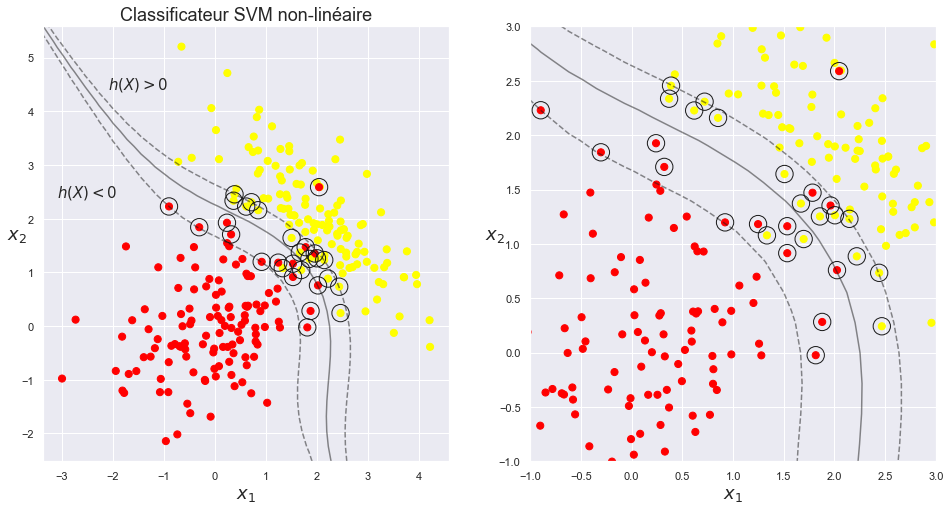

In [16]:
# Affichage des résultats de classification en utilisant les données d'entrainement

fig = plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
ax = plt.gca()
ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax.text(-1.5,4.5, "$h(X)>0$", ha="center", va="center", size=15)
ax.text(-2.5,2.5, "$h(X)<0$", ha="center", va="center", size=15)
ax.set_title('Classificateur SVM non-linéaire',fontsize=18)

plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
ax = plt.gca()
ax.set_xlim([-1,3])
ax.set_ylim([-1,3])
ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
plt.savefig('similar_to_page_59_3.svg', format='svg')
#plt.savefig('similar_to_page_59_3.svg', format='png')
plt.show()